In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import mglearn

In [2]:
bcd = pd.read_csv("wdbc.csv")
bcd.columns = list(["ID", "Diagnosis"] + ["Feature " + str(x) for x in range(1, 31)])
bcd.head()

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [3]:
# Scaling data
ord_enc = OrdinalEncoder()

y = ord_enc.fit_transform(bcd[["Diagnosis"]]).ravel().astype(int)
X = bcd[["Feature " + str(x) for x in range(1, 31)]].to_numpy()

# print(y)
# print(bcd[["Feature " + str(x) for x in range(1, 31)]].to_numpy())
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y
)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_test_scaled : {}".format(X_test_scaled))
print("X_train_scaled : {}".format(X_train_scaled))
print("y : {}".format(y))


X_test_scaled : [[0.09754366 0.31078796 0.11250086 ... 0.39347079 0.30948157 0.33097206]
 [0.28534242 0.42306392 0.26411444 ... 0.03181787 0.14389907 0.02223534]
 [0.13564296 0.20189381 0.13274826 ... 0.2243299  0.18470333 0.24301456]
 ...
 [0.13048417 0.07642881 0.120586   ... 0.         0.30356791 0.17361931]
 [0.35728146 0.14440311 0.34600235 ... 0.36735395 0.20520402 0.15125279]
 [0.16986133 0.29117349 0.15914588 ... 0.07635739 0.22353637 0.08080808]]
X_train_scaled : [[0.2465332  0.12106865 0.24386704 ... 0.28134021 0.37532032 0.24511347]
 [0.60338871 0.34190057 0.60058047 ... 0.86151203 0.23339247 0.48970222]
 [0.22239576 0.21846466 0.21905881 ... 0.33728522 0.24423418 0.16528926]
 ...
 [0.32509821 0.18498478 0.31234884 ... 0.34340206 0.27399961 0.09235209]
 [0.03540158 0.53364897 0.02895446 ... 0.         0.29430317 0.29083038]
 [0.33314402 0.20121745 0.31649506 ... 0.28233677 0.11255667 0.07910272]]
y : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0


In [4]:

LR1 = LogisticRegression()
LR100 = LogisticRegression(C = 100)
LR001 = LogisticRegression(C = 0.01)

logreg1 = LR1.fit(X_train_scaled, y_train)
logreg100 = LR100.fit(X_train_scaled, y_train)
logreg001 = LR001.fit(X_train_scaled, y_train)

print("X_train_scaled")
print("Logistic regression C = 1 : {}".format(logreg1.score(X_train_scaled, y_train)))
print("Logistic regression C = 100 : {}".format(logreg100.score(X_train_scaled, y_train)))
print("Logistic regression C = 0.01 : {}".format(logreg001.score(X_train_scaled, y_train)))

print("\nX_test")
print("Logistic regression C = 1 : {}".format(logreg1.score(X_test_scaled, y_test)))
print("Logistic regression C = 100 : {}".format(logreg100.score(X_test_scaled, y_test)))
print("Logistic regression C = 0.01 : {}".format(logreg001.score(X_test_scaled, y_test)))

X_train_scaled
Logistic regression C = 1 : 0.9671361502347418
Logistic regression C = 100 : 0.9859154929577465
Logistic regression C = 0.01 : 0.7535211267605634

X_test
Logistic regression C = 1 : 0.9507042253521126
Logistic regression C = 100 : 0.9859154929577465
Logistic regression C = 0.01 : 0.676056338028169


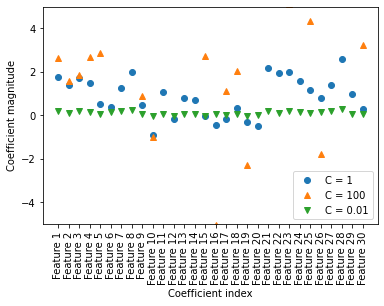

In [5]:
plt.plot(logreg1.coef_.T, 'o', label = "C = 1")
plt.plot(logreg100.coef_.T, '^', label = "C = 100")
plt.plot(logreg001.coef_.T, 'v', label = "C = 0.01")
plt.xticks(range(len(bcd.columns[2:])), bcd.columns[2:], rotation = 90)
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0])